# CNN

# Libraries Include

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from keras.regularizers import l2
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model


# Load dataset

In [ ]:
traindata = pd.read_csv('../input/nslkdd/kdd_train.csv')
testdata = pd.read_csv('../input/nslkdd/kdd_test.csv')

In [ ]:
data = pd.concat([traindata,testdata])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
categ = ['protocol_type','service','flag','labels']
# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [ ]:
indexNames = data[ data['labels'] == 35 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [ ]:
X= data.iloc[:,0:41]
Y=data['labels']

# Normalization

In [ ]:
scaler = Normalizer().fit(X)
X= scaler.transform(X)

# Smote for data balancing (Synthetic Minority Over-sampling Technique)

In [ ]:
sm = SMOTE(random_state=42,k_neighbors=1)
X_res, y_res = sm.fit_resample(X, Y)
y_res.value_counts()

16    78587
14    78587
9     78587
30    78587
17    78587
0     78587
11    78587
5     78587
21    78587
10    78587
29    78587
24    78587
28    78587
22    78587
36    78587
26    78587
34    78587
8     78587
18    78587
33    78587
27    78587
32    78587
7     78587
20    78587
31    78587
15    78587
25    78587
19    78587
6     78587
1     78587
4     78587
3     78587
12    78587
23    78587
2     78587
13    78587
Name: labels, dtype: int64

# data split into train and testing 

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X_res,y_res, test_size=0.2 , stratify=y_res)
Y_train.value_counts()

12    62870
7     62870
34    62870
2     62870
24    62870
5     62870
0     62870
4     62870
29    62870
21    62870
10    62870
3     62870
15    62870
19    62870
17    62870
33    62870
27    62870
11    62870
13    62870
16    62870
14    62870
9     62869
32    62869
20    62869
28    62869
6     62869
26    62869
18    62869
1     62869
8     62869
25    62869
30    62869
23    62869
31    62869
36    62869
22    62869
Name: labels, dtype: int64

# reshape dataset for input into cnn model

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


# CNN Model Implementation

In [ ]:
cnn = Sequential()

cnn.add(Convolution1D(128,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1,
                 input_shape=(41, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.5))

cnn.add(LSTM(70))
cnn.add(Dense(41, activation="softmax"))


2022-09-14 05:47:17.941279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 05:47:18.117363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 05:47:18.118418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 05:47:18.120436: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [ ]:
history=cnn.fit(X_train, Y_train, epochs=10,verbose=1,batch_size=500,validation_data=(X_test, Y_test))

2022-09-14 05:47:22.549492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-14 05:47:25.472702: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


4527/4527 [==============================] - 44s 7ms/step - loss: 0.7440 - accuracy: 0.7681 - val_loss: 0.2427 - val_accuracy: 0.9182
Epoch 2/10
4527/4527 [==============================] - 35s 8ms/step - loss: 0.2105 - accuracy: 0.9244 - val_loss: 0.1411 - val_accuracy: 0.9467
Epoch 3/10
4527/4527 [==============================] - 35s 8ms/step - loss: 0.1386 - accuracy: 0.9496 - val_loss: 0.0954 - val_accuracy: 0.9657
Epoch 4/10
4527/4527 [==============================] - 34s 7ms/step - loss: 0.1023 - accuracy: 0.9631 - val_loss: 0.0742 - val_accuracy: 0.9718
Epoch 5/10
4527/4527 [==============================] - 33s 7ms/step - loss: 0.0834 - accuracy: 0.9687 - val_loss: 0.0607 - val_accuracy: 0.9758
Epoch 6/10
4527/4527 [==============================] - 32s 7ms/step - loss: 0.0718 - accuracy: 0.9722 - val_loss: 0.0563 - val_accuracy: 0.9771
Epoch 7/10
4527/4527 [==============================] - 33s 7ms/step - loss: 0.0646 - accuracy: 0.9744 - val_loss: 0.0496 - val_accuracy: 0.9

# Evaluation Model 

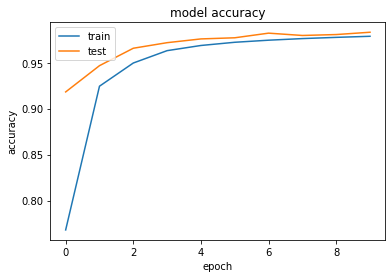

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

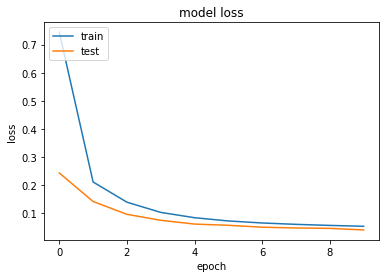

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = cnn.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

17683/17683 [==============================] - 60s 3ms/step - loss: 0.0399 - accuracy: 0.9831

Loss: 0.04, Accuracy: 98.31%


# Save model for use 

In [ ]:
save_model(cnn,'NSL_KDD_CNN.h5')

# Load Model for testing

In [ ]:
model2=load_model('NSL_KDD_CNN.h5')

In [ ]:
model2.evaluate(X_test,Y_test)

17683/17683 [==============================] - 61s 3ms/step - loss: 0.0399 - accuracy: 0.9831


[0.03989468514919281, 0.983093798160553]

In [ ]:
model2.predict(X_test[[0]])

array([[9.38934369e-13, 2.02915060e-14, 2.83944892e-14, 8.06073361e-13,
        8.55995640e-14, 6.79670831e-16, 3.94030119e-16, 2.31182025e-08,
        2.67368354e-12, 2.49853888e-16, 2.90255557e-19, 1.79181097e-08,
        3.27020098e-17, 2.59926525e-11, 9.99999881e-01, 3.07758410e-16,
        9.03734598e-09, 1.35533662e-16, 1.05696972e-12, 2.52643855e-16,
        6.04981309e-08, 4.39310627e-17, 1.21546277e-16, 2.35471221e-15,
        4.38926923e-10, 5.17706378e-10, 7.37032749e-17, 3.26570124e-13,
        6.48863897e-14, 4.95712103e-17, 1.57593574e-11, 1.69594580e-14,
        1.12145915e-13, 2.25680932e-10, 9.08067499e-14, 9.70151050e-15,
        6.58408154e-15, 9.08685596e-15, 1.49647293e-14, 6.90985677e-15,
        1.09757767e-14]], dtype=float32)

In [ ]:
b=model2.predict(X_test)

In [ ]:
b

array([[9.38930791e-13, 2.02913891e-14, 2.83943825e-14, ...,
        1.49646717e-14, 6.90983051e-15, 1.09757352e-14],
       [2.12558248e-12, 9.15632587e-13, 1.25771686e-08, ...,
        1.58260547e-12, 1.88516325e-12, 7.20391411e-13],
       [3.94514776e-09, 2.89424240e-09, 1.34142235e-08, ...,
        1.25234745e-09, 6.31902419e-10, 6.45279330e-10],
       ...,
       [2.10304029e-06, 9.99492645e-01, 2.62442927e-06, ...,
        7.42861272e-10, 8.19548096e-10, 5.80553883e-10],
       [1.71683834e-10, 2.69611355e-09, 1.87930365e-08, ...,
        2.58335124e-11, 4.73191174e-11, 2.41208078e-11],
       [7.01944058e-10, 9.97061312e-01, 1.19662633e-04, ...,
        4.70027825e-13, 5.27864156e-13, 4.18370525e-13]], dtype=float32)

In [ ]:
np.argmax(b[0])

14

In [ ]:
Y.head

<bound method NDFrame.head of 0        16
1        16
2        14
3        16
4        16
         ..
22539    25
22540    16
22541    14
22542    20
22543    16
Name: labels, Length: 148515, dtype: int64>

In [ ]:
data['labels']

0        16
1        16
2        14
3        16
4        16
         ..
22539    25
22540    16
22541    14
22542    20
22543    16
Name: labels, Length: 148515, dtype: int64

In [ ]:
data2 = pd.concat([traindata,testdata])
data2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
Y2=data2['labels']
Y2.head

<bound method NDFrame.head of 0           normal
1           normal
2          neptune
3           normal
4           normal
           ...    
22539        satan
22540       normal
22541      neptune
22542    portsweep
22543       normal
Name: labels, Length: 148517, dtype: object>

In [ ]:
type=Y2.value_counts()


In [ ]:
print(type[0])

78588


In [ ]:
key=type.keys()

In [ ]:
labels=[]
for i in key:
    labels.append(i)

In [ ]:
labels

['normal',
 'neptune',
 'satan',
 'ipsweep',
 'portsweep',
 'smurf',
 'nmap',
 'back',
 'warezclient',
 'teardrop',
 'guess_passwd',
 'mscan',
 'warezmaster',
 'pod',
 'apache2',
 'processtable',
 'snmpguess',
 'mailbomb',
 'saint',
 'buffer_overflow',
 'snmpgetattack',
 'httptunnel',
 'land',
 'multihop',
 'rootkit',
 'loadmodule',
 'imap',
 'ftp_write',
 'ps',
 'sendmail',
 'phf',
 'perl',
 'xlock',
 'xterm',
 'spy',
 'named',
 'xsnoop']

In [ ]:
print(labels[np.argmax(b[0])])

apache2


In [ ]:
len(labels)

37

In [ ]:
Y_test.shape

(565827,)

In [ ]:
predi=[]
actual=[]
for i in b:
    predi.append(labels[np.argmax(i)])
for i in Y_test:
    actual.append(labels[i])

In [ ]:
len(predi)
len(actual)

565827

In [ ]:
len(labels)

37

# Confusion Matrix

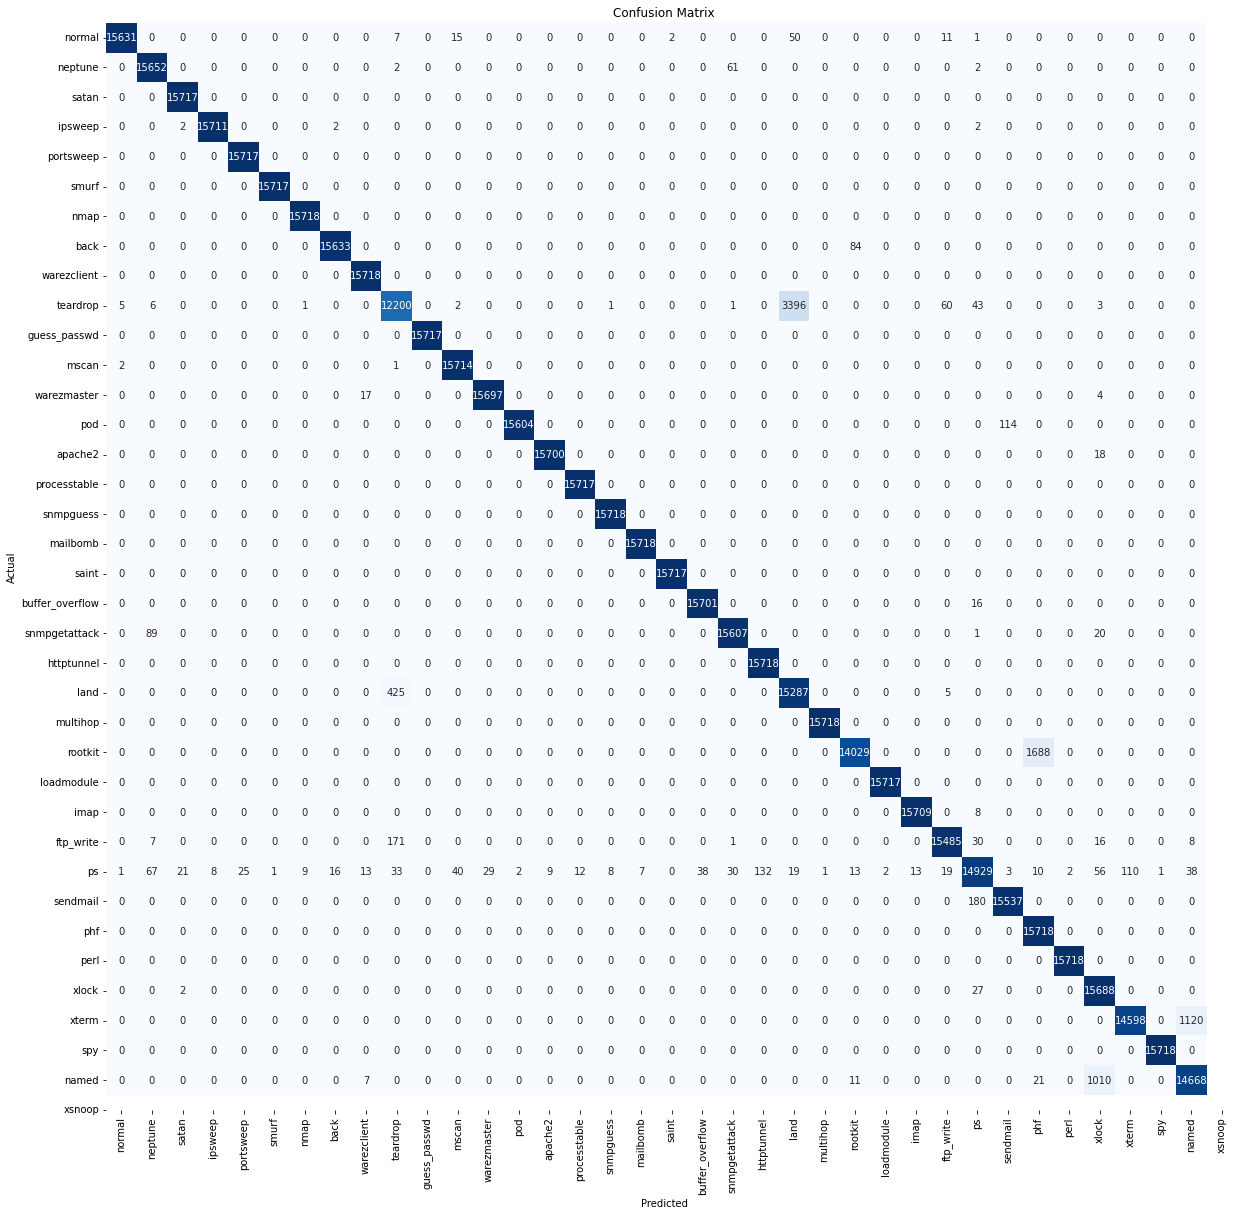

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(np.array(actual),np.array(predi))
# plot the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(37)+.5, labels, rotation=90)
plt.yticks(np.arange(37)+.5, labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
l=set(actual)

# Classification report

In [ ]:
clr = classification_report(np.array(actual),np.array(predi), target_names=l, digits= 4)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                  precision    recall  f1-score   support

             ps     0.9995    0.9945    0.9970     15717
   guess_passwd     0.9893    0.9959    0.9926     15717
          xterm     0.9984    1.0000    0.9992     15717
            phf     0.9995    0.9996    0.9996     15717
    warezmaster     0.9984    1.0000    0.9992     15717
           land     0.9999    1.0000    1.0000     15717
  snmpgetattack     0.9994    1.0000    0.9997     15718
        rootkit     0.9988    0.9947    0.9967     15717
      snmpguess     0.9977    1.0000    0.9988     15718
           imap     0.9502    0.7762    0.8544     15718
            spy     1.0000    1.0000    1.0000     15717
          smurf     0.9964    0.9998    0.9981     15717
       sendmail     0.9982    0.9987    0.9984     15718
          saint     0.9999    0.9927    0.9963     15718
     loadmodule     0.9994    0.9989    0.9991     15718
       teardrop     0.9992    1.0000    